# K-Means για TfidfVectorizer

In [55]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from string import punctuation
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import numpy as np
import scipy
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize

# Set figure size a bit bigger than default so everything is easily red
plt.rcParams["figure.figsize"] = (11, 7)

In [56]:
#eisagw ta dedomena gia sugkrisi
data = pd.read_csv('updated_data.tsv',sep="\t",encoding='utf-8')
X = data["content"]
#allazw ti morfi twn category apo business,tech,politics klp se ari8mous apo to 0-4
le = preprocessing.LabelEncoder()
le.fit(data["category"])
y = le.transform(data["category"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
import pandas as pd
import gensim

# Word2Vec 
tokenized_X_train = [ (str(article)).split() for article in X_train ]

In [68]:
# train the w2vec model with the words from both the training and test sets
model = gensim.models.Word2Vec (tokenized_X_train, size=150, window=10, min_count=2, workers=10)
model.train(tokenized_X_train,total_examples=len(tokenized_X_train),epochs=10)

(3538268, 3682970)

In [69]:
# look up top 6 words similar to 'polite'
w1 = ["president"]
model.wv.most_similar (positive=w1,topn=6)

[('bert', 0.8856576681137085),
 ('w', 0.866936445236206),
 ('bush', 0.863359272480011),
 ('ministrys', 0.8292883634567261),
 ('putin', 0.8241482973098755),
 ('deputy', 0.8170360326766968)]

In [70]:
from gensim.models import Word2Vec
 
from nltk.cluster import KMeansClusterer
import nltk
 
from sklearn import cluster
from sklearn import metrics

# training model
model = Word2Vec(tokenized_X_train, size=150, window=10, min_count=2, workers=10)
 
# get vector data
X = model[model.wv.vocab]
#print (X)
 
#print (model.similarity('post', 'book'))
 
#print (model.most_similar(positive=['machine'], negative=[], topn=2))
 
#print (list(model.wv.vocab))
 
#print (len(list(model.wv.vocab)))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [72]:
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
 
words = list(model.wv.vocab)
#for i, word in enumerate(words):  
    #print (word + ":" + str(assigned_clusters[i]))
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
#print ("Cluster id labels for inputted data")
#print (labels)
#print ("Centroids data")
#print (centroids)
 
#print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
#print (kmeans.score(X))
 
#silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
#print ("Silhouette_score: ")
#print (silhouette_score)

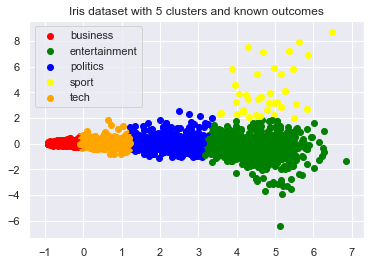

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pylab as pl
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
X.shape

for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='red')
    elif labels[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='green')
    elif labels[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='blue')
    elif labels[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='yellow')
    elif labels[i] == 4:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='orange')
        
pl.legend([c1, c2, c3, c4 ,c5], ['business', 'entertainment','politics','sport','tech'])
pl.title('Iris dataset with 5 clusters and known outcomes')
pl.show()